# Preparing our dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("fma-rock-vs-hiphop.csv")
df1= pd.read_json("echonest-metrics.json")

In [3]:
df.shape

(17734, 21)

In [4]:
df.columns.values

array(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code',
       'license', 'listens', 'lyricist', 'number', 'publisher', 'tags',
       'title'], dtype=object)

In [5]:
df.head(5)

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [6]:
df1.shape

(13129, 9)

In [7]:
df1.columns.values

array(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'],
      dtype=object)

In [8]:
df1.head(5)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [9]:
df_df1 = df1.merge(df[['track_id','genre_top']], on='track_id')

In [10]:
df_df1

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


# Pairwise relationships between continuous variables

In [11]:
corr_metrics = df_df1.corr()
corr_metrics

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


# Normalizing the feature data

In [12]:
features = df_df1.drop(['genre_top', 'track_id'], axis=1)

In [13]:
labels = df_df1['genre_top']

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

# Principal Component Analysis on our scaled data

In [16]:
from sklearn.decomposition import PCA 

In [17]:
pca = PCA()
pca.fit(scaled_train_features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
exp_var = pca.explained_variance_ratio_

Text(0.5, 0, 'Principal Component #')

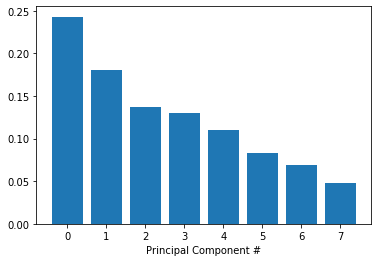

In [19]:
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),exp_var)
ax.set_xlabel('Principal Component #')

# further visualization of PCA

In [20]:
import numpy as np

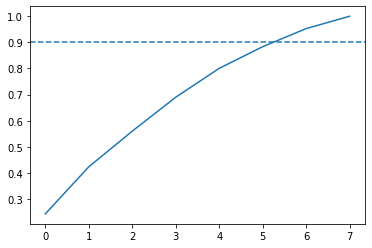

In [21]:
cum_exp_variance = np.cumsum(exp_var)
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')

In [22]:
n_components = ((np.where(cum_exp_variance > 0.9))[0][0])

In [23]:
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

# Train a decision tree to classify genre

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [25]:
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels,random_state=10)

In [26]:
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features,train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [27]:
pred_labels_tree = tree.predict(test_features)

# Compare our decision tree to a logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features,train_labels)
pred_labels_logit = logreg.predict(test_features)

In [30]:
from sklearn.metrics import classification_report

In [31]:
class_rep_tree = classification_report(test_labels,pred_labels_tree)
class_rep_log = classification_report(test_labels,pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



# Balance our data for greater performance

In [32]:
hop_only = df_df1.loc[df_df1['genre_top'] == 'Hip-Hop']
rock_only = df_df1.loc[df_df1['genre_top'] == 'Rock']
print(hop_only.head())

     track_id  acousticness  danceability    energy  instrumentalness  \
0           2      0.416675      0.675894  0.634476          0.010628   
1           3      0.374408      0.528643  0.817461          0.001851   
2           5      0.043567      0.745566  0.701470          0.000697   
3         134      0.452217      0.513238  0.560410          0.019443   
118       583      0.748986      0.765886  0.513173          0.957209   

     liveness  speechiness    tempo   valence genre_top  
0    0.177647     0.159310  165.922  0.576661   Hip-Hop  
1    0.105880     0.461818  126.957  0.269240   Hip-Hop  
2    0.373143     0.124595  100.260  0.621661   Hip-Hop  
3    0.096567     0.525519  114.290  0.894072   Hip-Hop  
118  0.614844     0.886914  180.025  0.401672   Hip-Hop  


In [33]:
rock_only = rock_only.sample(n=len(hop_only),random_state=10)


In [34]:
rock_hop_bal = pd.concat([hop_only,rock_only])

In [35]:
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

In [36]:
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,random_state=10)

# Does balancing our dataset improve model bias?

In [37]:
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features,train_labels)
pred_labels_tree = tree.predict(test_features)

In [38]:
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features,train_labels)
pred_labels_logit = logreg.predict(test_features)

In [39]:
print("Decision Tree: \n", classification_report(test_labels,pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels,pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.76      0.80      0.78       225
        Rock       0.79      0.75      0.77       230

    accuracy                           0.77       455
   macro avg       0.77      0.77      0.77       455
weighted avg       0.77      0.77      0.77       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.83      0.80      0.82       225
        Rock       0.81      0.84      0.83       230

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



# Using cross-validation to evaluate our models

In [40]:
from sklearn.model_selection import KFold, cross_val_score
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [41]:
kf = KFold(n_splits=10,random_state=10)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)


C:\Users\ajay7\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [42]:
tree_score = cross_val_score(tree,pca_projection,labels,cv=kf)
logit_score = cross_val_score(logreg,pca_projection,labels,cv=kf)

In [43]:
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.7489010989010989 Logistic Regression: 0.782967032967033
